## Load image

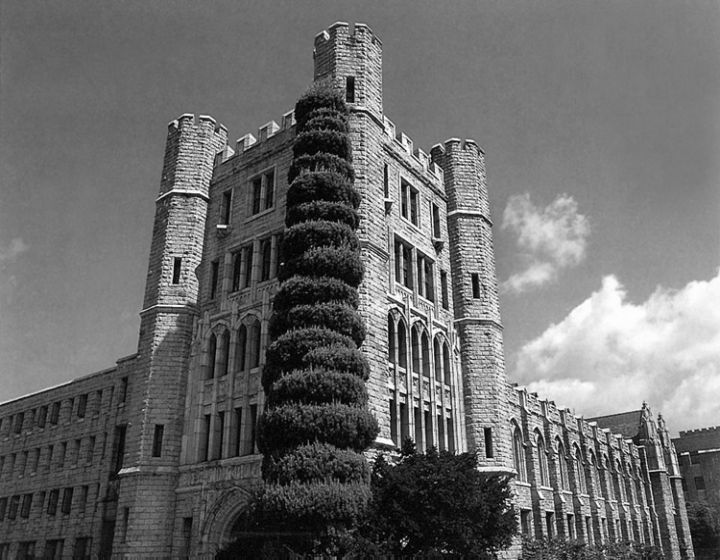

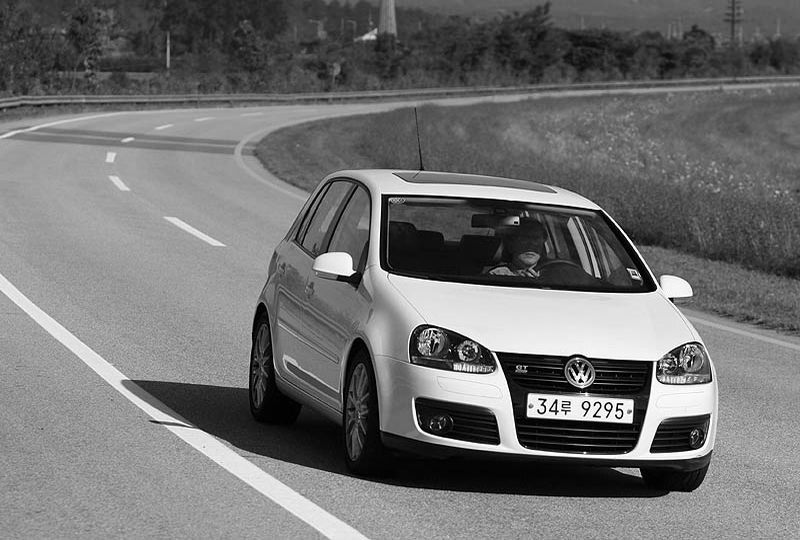

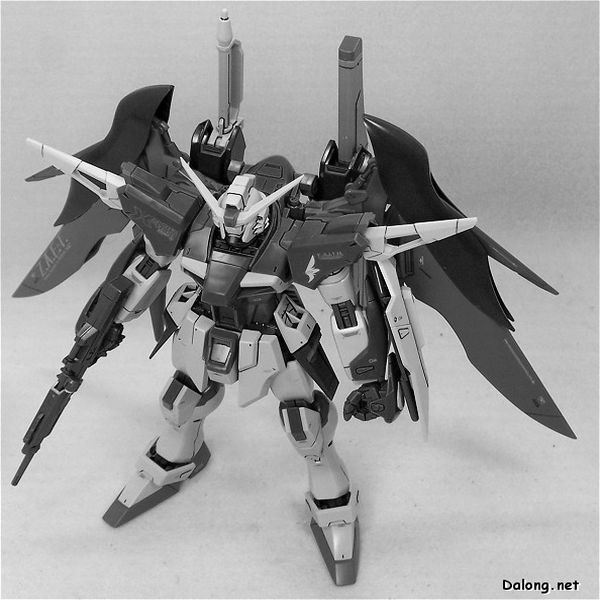

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img_ku = cv2.imread("/content/drive/My Drive/computer_vision/KU.jpg")
img_golf = cv2.imread("/content/drive/My Drive/computer_vision/Golf.jpg")
img_gundam = cv2.imread("/content/drive/My Drive/computer_vision/Gundam.jpg")

cv2_imshow(img_ku)
cv2_imshow(img_golf)
cv2_imshow(img_gundam)

## Define functions

In [0]:
# default parameters
max_iter_value = 100

def reshape_input(image):
    """Changes data type to float32 and reshape. """
    vectorized = np.float32(image)
    vectorized = vectorized.reshape((-1,1)) # -1,1 because it's black and white
    return vectorized

def k_means(data, k, max_iter = 100):
    """Assigns data points into clusters using the k-means algorithm.

    Parameters
    ----------
    data : ndarray
        A 2D array containing data points to be clustered.
    k : int
        Number of clusters.
    max_iter : int, optional
        Number of maximum iterations (default = 100)

    Returns
    -------
    labels : ndarray
        A 1D array of labels for their respective input data points.
    centroids : ndarray
        Centroids of each cluster.
    sse_list : list
        List of sum of squared errors in each iteration step.
    """

    # data_max/data_min : array containing column-wise maximum/minimum values
    data_max = np.max(data, axis=0)
    data_min = np.min(data, axis=0)

    n_samples = data.shape[0]
    n_features = data.shape[1]

    # labels : array containing labels for data points, randomly initialized
    labels = np.random.randint(low=0, high=k, size=n_samples)

    # centroids : 2D containing centroids for the k-means algorithm
    # randomly initialized s.t. data_min <= centroid < data_max
    centroids = np.random.uniform(low=0., high=1., size=(k, n_features))
    centroids = centroids * (data_max - data_min) + data_min

    # sum_squared_error : SSE at each iteration step
    sse_list = []

    # k-means main algorithm
    for i in range(max_iter):
        # distances(cost) : between datapoints and centroids
        distances = np.array(
            [np.linalg.norm(data - c, axis=1) for c in centroids])
        # distances into sum of squared error and append to list
        squared_error = np.square(distances)
        sum_squared_error = np.sum(squared_error)
        sse_list.append(sum_squared_error)
        # new_labels : computed by finding centroid with minimal distance
        new_labels = np.argmin(distances, axis=0)
    
        if (labels == new_labels).all():
                # labels unchanged
                labels = new_labels
                print('Labels unchanged ! Terminating k-means.')
                print('')
                print('-- Result: Average gray level of the clusters --')
                print(np.around(centroids,3).tolist())
                break
        else:
                # labels changed
                # difference : percentage of changed labels
                difference = np.mean(labels != new_labels)
                print(f'-- Iteration step {i} --')
                print(f'SSE : {sum_squared_error: .3f}')
                print(f'{(difference*100):.3f}% labels changed')
                labels = new_labels
                for c in range(k):
                    # computing centroids by taking the mean over associated data points
                    centroids[c] = np.mean(data[labels == c], axis=0)

    return labels, centroids, sse_list

def plot_iteration_cost(sse_list):
    """Plots SSE of each iteration step."""
    plt.figure(figsize=(8,4))
    plt.xlabel('number of iteration')
    plt.ylabel('sum of squared error')
    plt.title('cost at each iteration step')
    plt.plot(sse_list)
    print('-- Result: SSE of each iteration step --')
    plt.show()

## Applications 1) KU.raw & k = 2

In [0]:
target_img = img_ku
k_value = 2

-- Iteration step 0 --
SSE :  10381721863.184
50.030% labels changed
-- Iteration step 1 --
SSE :  15992514613.051
2.277% labels changed
-- Iteration step 2 --
SSE :  15178172545.292
1.446% labels changed
-- Iteration step 3 --
SSE :  14729845898.625
1.042% labels changed
-- Iteration step 4 --
SSE :  14435588491.163
0.585% labels changed
-- Iteration step 5 --
SSE :  14280280503.838
0.665% labels changed
-- Iteration step 6 --
SSE :  14112230895.954
0.758% labels changed
-- Iteration step 7 --
SSE :  13931839909.838
0.767% labels changed
Labels unchanged ! Terminating k-means.

-- Result: Average gray level of the clusters --
[[80.544], [173.541]]
-- Result: SSE of each iteration step --


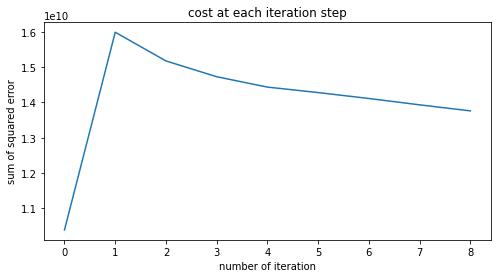

In [41]:
vec_img = reshape_input(target_img)
labels, centroids, sse_list = k_means(vec_img, k = k_value)
plot_iteration_cost(sse_list)

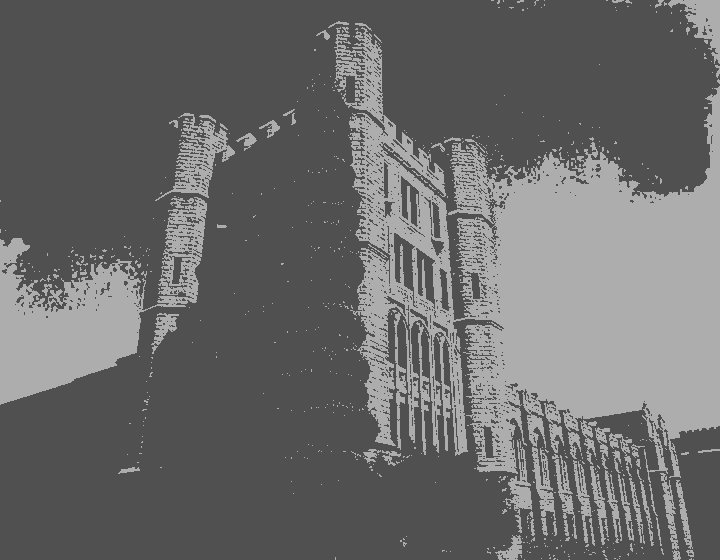

In [42]:
map_label = lambda x: float(centroids[x])
vfunc = np.vectorize(map_label)
labeled = vfunc(labels)
res_labels=labeled.reshape(target_img.shape)
cv2_imshow(res_labels)

In [43]:
# save clustered image to jpg
cv2.imwrite(f'KU_k={k_value}.jpg',res_labels)

True

## Applications 2) KU.raw & k = 4

In [0]:
target_img = img_ku
k_value = 4

-- Iteration step 0 --
SSE :  42539740580.186
74.894% labels changed
-- Iteration step 1 --
SSE :  35937547154.003
10.633% labels changed
-- Iteration step 2 --
SSE :  36395827016.912
6.426% labels changed
-- Iteration step 3 --
SSE :  36819637026.941
3.801% labels changed
-- Iteration step 4 --
SSE :  36837494418.950
1.817% labels changed
-- Iteration step 5 --
SSE :  36830081583.226
0.904% labels changed
-- Iteration step 6 --
SSE :  36810425357.870
0.879% labels changed
-- Iteration step 7 --
SSE :  36784067294.965
0.379% labels changed
-- Iteration step 8 --
SSE :  36640546968.247
0.370% labels changed
-- Iteration step 9 --
SSE :  36608657658.701
0.218% labels changed
Labels unchanged ! Terminating k-means.

-- Result: Average gray level of the clusters --
[[24.718], [204.755], [122.115], [70.778]]
-- Result: SSE of each iteration step --


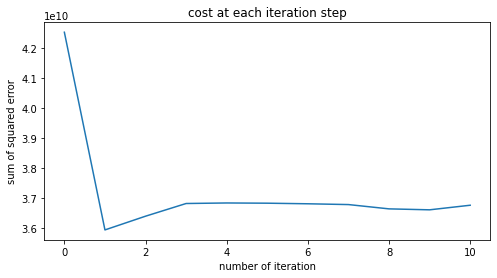

In [8]:
vec_img = reshape_input(target_img)
labels, centroids, sse_list = k_means(vec_img, k = k_value)
plot_iteration_cost(sse_list)

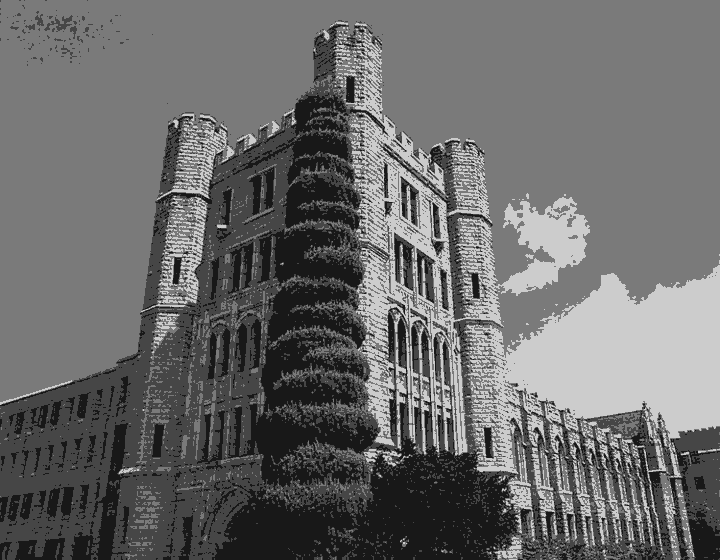

In [9]:
map_label = lambda x: float(centroids[x])
vfunc = np.vectorize(map_label)
labeled = vfunc(labels)
res_labels=labeled.reshape(target_img.shape)
cv2_imshow(res_labels)

In [10]:
# save clustered image to jpg
cv2.imwrite(f'KU_k={k_value}.jpg',res_labels)

True

## Applications 3) KU.raw & k = 8

In [0]:
target_img = img_ku
k_value = 8

-- Iteration step 0 --
SSE :  114821665006.293
87.499% labels changed
-- Iteration step 1 --
SSE :  112523387433.380
14.061% labels changed
-- Iteration step 2 --
SSE :  110640854239.515
6.142% labels changed
-- Iteration step 3 --
SSE :  108475985635.426
4.098% labels changed
-- Iteration step 4 --
SSE :  106841713567.439
3.101% labels changed
-- Iteration step 5 --
SSE :  104944503183.963
2.067% labels changed
-- Iteration step 6 --
SSE :  103325658619.554
2.581% labels changed
-- Iteration step 7 --
SSE :  101734637643.616
2.442% labels changed
-- Iteration step 8 --
SSE :  100214506369.528
2.495% labels changed
-- Iteration step 9 --
SSE :  98631412889.073
2.102% labels changed
-- Iteration step 10 --
SSE :  97143317594.097
1.252% labels changed
-- Iteration step 11 --
SSE :  95884241108.745
2.740% labels changed
-- Iteration step 12 --
SSE :  94306712730.708
3.331% labels changed
-- Iteration step 13 --
SSE :  93037246337.418
3.763% labels changed
-- Iteration step 14 --
SSE :  91

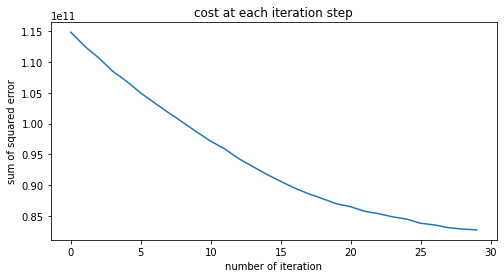

In [12]:
vec_img = reshape_input(target_img)
labels, centroids, sse_list = k_means(vec_img, k = k_value)
plot_iteration_cost(sse_list)

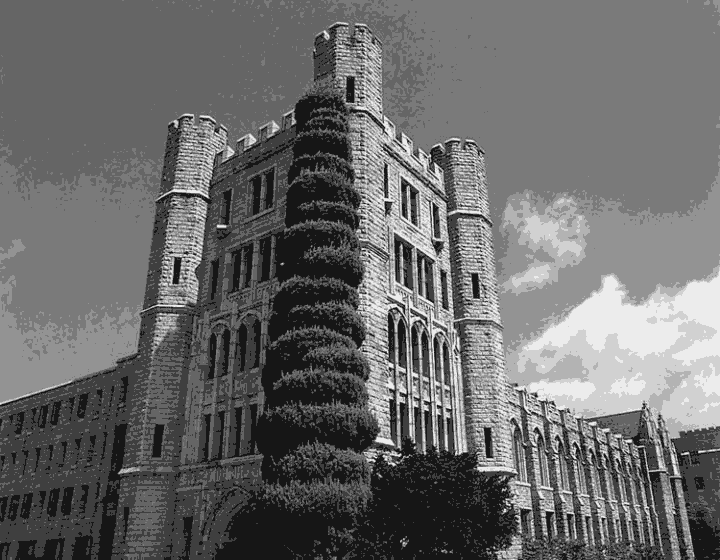

In [13]:
map_label = lambda x: float(centroids[x])
vfunc = np.vectorize(map_label)
labeled = vfunc(labels)
res_labels=labeled.reshape(target_img.shape)
cv2_imshow(res_labels)

In [14]:
# save clustered image to jpg
cv2.imwrite(f'KU_k={k_value}.jpg',res_labels)

True

## Applications 4) Gundam.raw & k = 2

In [0]:
target_img = img_gundam
k_value = 2

-- Iteration step 0 --
SSE :  34848722521.366
49.997% labels changed
-- Iteration step 1 --
SSE :  25076132687.705
13.580% labels changed
-- Iteration step 2 --
SSE :  19570047347.277
2.278% labels changed
-- Iteration step 3 --
SSE :  18686030119.652
0.344% labels changed
-- Iteration step 4 --
SSE :  18531958267.950
0.093% labels changed
Labels unchanged ! Terminating k-means.

-- Result: Average gray level of the clusters --
[[188.862], [61.596]]
-- Result: SSE of each iteration step --


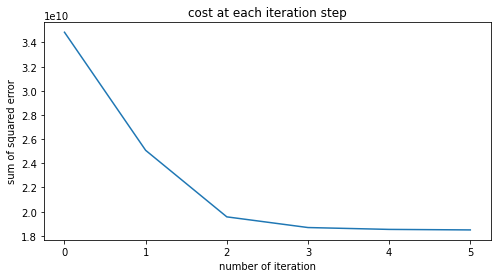

In [51]:
vec_img = reshape_input(target_img)
labels, centroids, sse_list = k_means(vec_img, k = k_value)
plot_iteration_cost(sse_list)

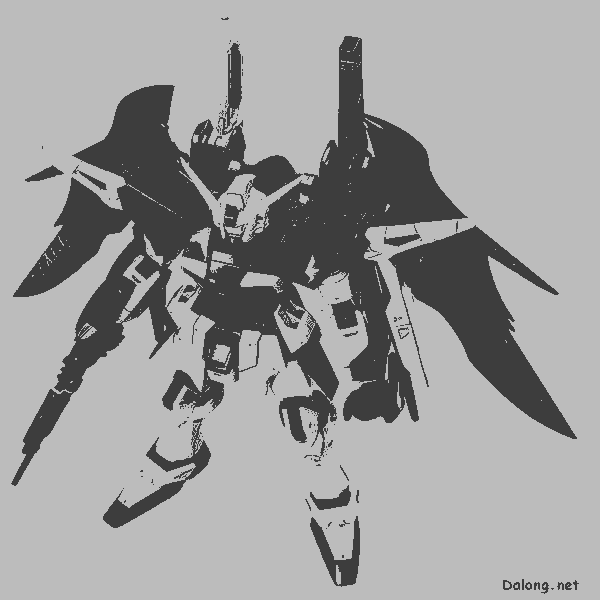

In [52]:
map_label = lambda x: float(centroids[x])
vfunc = np.vectorize(map_label)
labeled = vfunc(labels)
res_labels=labeled.reshape(target_img.shape)
cv2_imshow(res_labels)

In [53]:
# save clustered image to jpg
cv2.imwrite(f'Gundam_k={k_value}.jpg',res_labels)

True

## Applications 5) Gundam.raw & k = 4

In [0]:
target_img = img_gundam
k_value = 4

-- Iteration step 0 --
SSE :  49935004255.867
74.994% labels changed
-- Iteration step 1 --
SSE :  45478612570.363
1.584% labels changed
-- Iteration step 2 --
SSE :  44656053243.660
1.460% labels changed
-- Iteration step 3 --
SSE :  43964720956.855
2.113% labels changed
-- Iteration step 4 --
SSE :  43022339752.908
2.573% labels changed
-- Iteration step 5 --
SSE :  42231460928.184
2.786% labels changed
-- Iteration step 6 --
SSE :  41531034938.147
3.168% labels changed
-- Iteration step 7 --
SSE :  40765489382.441
3.235% labels changed
-- Iteration step 8 --
SSE :  40374178930.346
2.825% labels changed
-- Iteration step 9 --
SSE :  40075323553.416
2.122% labels changed
-- Iteration step 10 --
SSE :  39845269371.305
1.357% labels changed
-- Iteration step 11 --
SSE :  39571448731.080
1.366% labels changed
-- Iteration step 12 --
SSE :  39331658262.163
1.095% labels changed
Labels unchanged ! Terminating k-means.

-- Result: Average gray level of the clusters --
[[81.495], [197.492], 

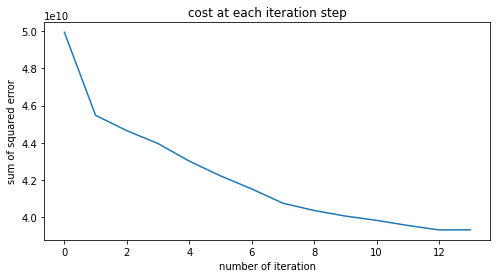

In [55]:
vec_img = reshape_input(target_img)
labels, centroids, sse_list = k_means(vec_img, k = k_value)
plot_iteration_cost(sse_list)

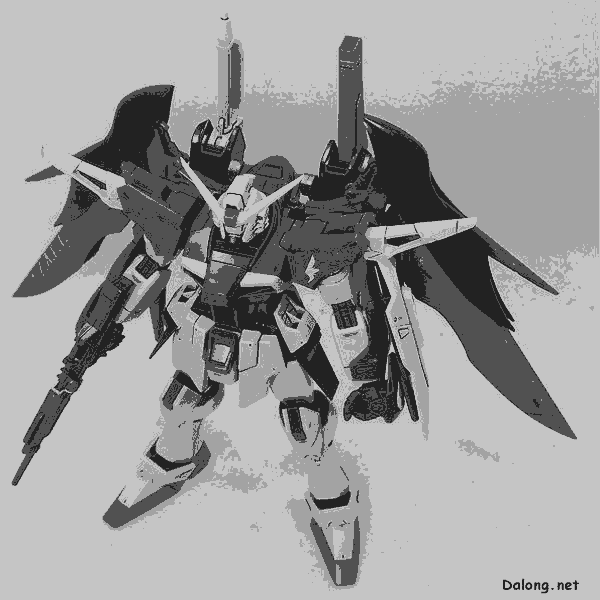

In [56]:
map_label = lambda x: float(centroids[x])
vfunc = np.vectorize(map_label)
labeled = vfunc(labels)
res_labels=labeled.reshape(target_img.shape)
cv2_imshow(res_labels)

In [57]:
# save clustered image to jpg
cv2.imwrite(f'Gundam_k={k_value}.jpg',res_labels)

True

## Applications 6) Gundam.raw & k = 8

In [0]:
target_img = img_gundam
k_value = 8

-- Iteration step 0 --
SSE :  77852187961.276
87.477% labels changed
-- Iteration step 1 --
SSE :  78774900089.978
10.379% labels changed
-- Iteration step 2 --
SSE :  79675254225.583
7.561% labels changed
-- Iteration step 3 --
SSE :  79601018465.484
2.735% labels changed
-- Iteration step 4 --
SSE :  79475574603.371
2.601% labels changed
-- Iteration step 5 --
SSE :  79191442463.936
2.273% labels changed
-- Iteration step 6 --
SSE :  78876616100.032
1.807% labels changed
-- Iteration step 7 --
SSE :  78328066692.721
1.885% labels changed
-- Iteration step 8 --
SSE :  77877571674.030
1.531% labels changed
-- Iteration step 9 --
SSE :  77400237497.339
2.541% labels changed
-- Iteration step 10 --
SSE :  76801893994.727
1.609% labels changed
-- Iteration step 11 --
SSE :  76431445783.840
1.594% labels changed
-- Iteration step 12 --
SSE :  76096585420.952
2.377% labels changed
-- Iteration step 13 --
SSE :  75660966374.741
0.105% labels changed
-- Iteration step 14 --
SSE :  75613971136

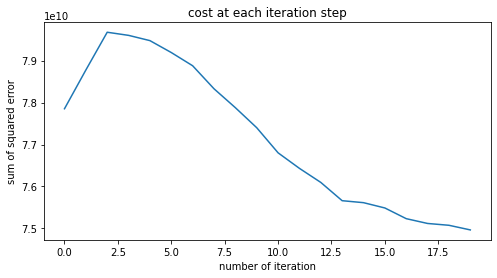

In [24]:
vec_img = reshape_input(target_img)
labels, centroids, sse_list = k_means(vec_img, k = k_value)
plot_iteration_cost(sse_list)

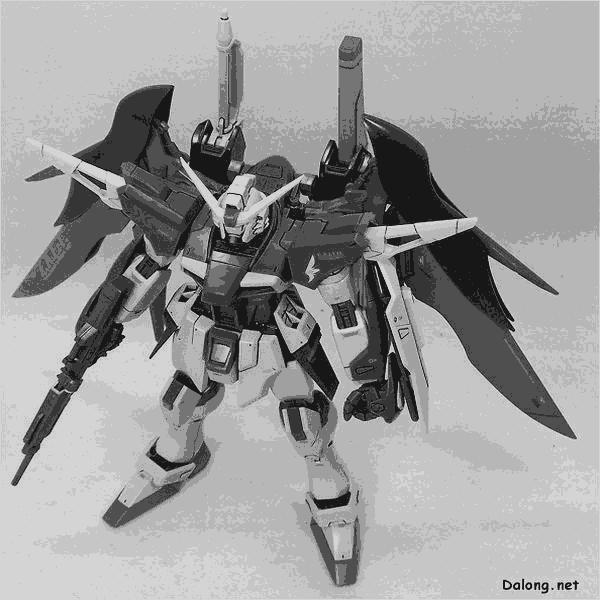

In [25]:
map_label = lambda x: float(centroids[x])
vfunc = np.vectorize(map_label)
labeled = vfunc(labels)
res_labels=labeled.reshape(target_img.shape)
cv2_imshow(res_labels)

In [26]:
# save clustered image to jpg
cv2.imwrite(f'Gundam_k={k_value}.jpg',res_labels)

True

## Applications 7) Golf.raw & k = 2

In [0]:
target_img = img_golf
k_value = 2

-- Iteration step 0 --
SSE :  28990664301.299
49.940% labels changed
-- Iteration step 1 --
SSE :  16753246549.495
7.702% labels changed
-- Iteration step 2 --
SSE :  16749660567.863
2.289% labels changed
-- Iteration step 3 --
SSE :  16726564974.032
0.659% labels changed
-- Iteration step 4 --
SSE :  16719030815.966
0.325% labels changed
Labels unchanged ! Terminating k-means.

-- Result: Average gray level of the clusters --
[[165.831], [62.27]]
-- Result: SSE of each iteration step --


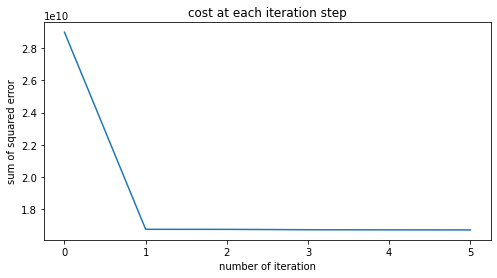

In [28]:
vec_img = reshape_input(target_img)
labels, centroids, sse_list = k_means(vec_img, k = k_value)
plot_iteration_cost(sse_list)

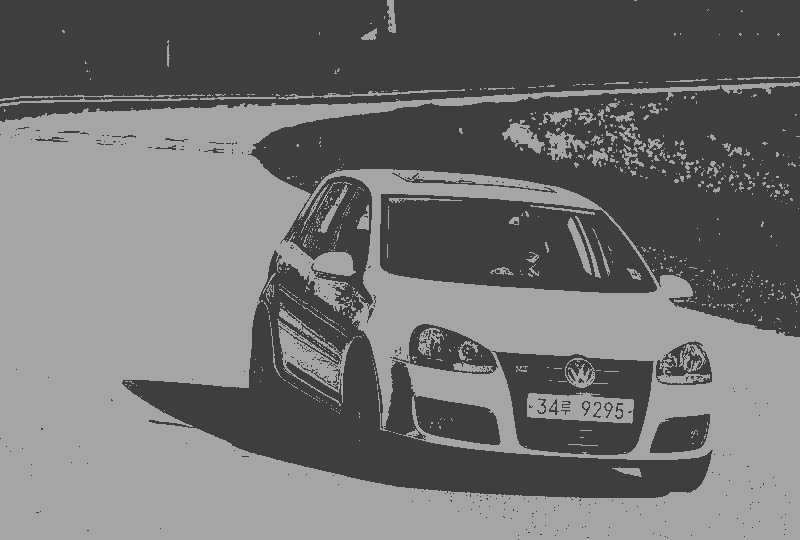

In [29]:
map_label = lambda x: float(centroids[x])
vfunc = np.vectorize(map_label)
labeled = vfunc(labels)
res_labels=labeled.reshape(target_img.shape)
cv2_imshow(res_labels)

In [30]:
# save clustered image to jpg
cv2.imwrite(f'Golf_k={k_value}.jpg',res_labels)

True

## Applications 8) Golf.raw & k = 4

In [0]:
target_img = img_golf
k_value = 4

-- Iteration step 0 --
SSE :  50456637926.767
75.047% labels changed
-- Iteration step 1 --
SSE :  44907454214.629
7.472% labels changed
-- Iteration step 2 --
SSE :  43337368451.888
5.401% labels changed
-- Iteration step 3 --
SSE :  42098707906.564
3.022% labels changed
-- Iteration step 4 --
SSE :  41277829367.587
2.399% labels changed
-- Iteration step 5 --
SSE :  40737644605.182
1.829% labels changed
-- Iteration step 6 --
SSE :  40222443501.382
1.150% labels changed
-- Iteration step 7 --
SSE :  39977418889.666
0.806% labels changed
-- Iteration step 8 --
SSE :  39705450232.773
0.812% labels changed
-- Iteration step 9 --
SSE :  39434879678.830
0.414% labels changed
-- Iteration step 10 --
SSE :  39474948212.542
0.502% labels changed
-- Iteration step 11 --
SSE :  39388227628.812
0.388% labels changed
Labels unchanged ! Terminating k-means.

-- Result: Average gray level of the clusters --
[[172.351], [105.193], [18.645], [60.792]]
-- Result: SSE of each iteration step --


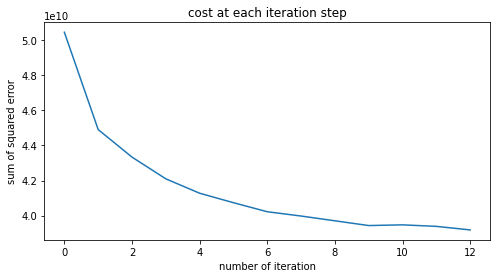

In [69]:
vec_img = reshape_input(target_img)
labels, centroids, sse_list = k_means(vec_img, k = k_value)
plot_iteration_cost(sse_list)

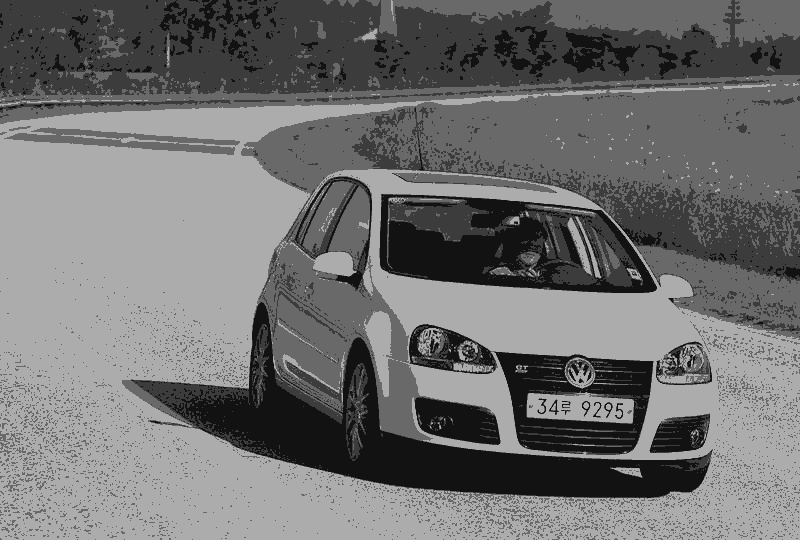

In [70]:
map_label = lambda x: float(centroids[x])
vfunc = np.vectorize(map_label)
labeled = vfunc(labels)
res_labels=labeled.reshape(target_img.shape)
cv2_imshow(res_labels)

In [71]:
# save clustered image to jpg
cv2.imwrite(f'Golf_k={k_value}.jpg',res_labels)

True

## Applications 9) Golf.raw & k = 8

In [0]:
target_img = img_golf
k_value = 8

-- Iteration step 0 --
SSE :  87772224943.775
87.542% labels changed
-- Iteration step 1 --
SSE :  94346665744.794
17.214% labels changed
-- Iteration step 2 --
SSE :  96475724394.075
12.936% labels changed
-- Iteration step 3 --
SSE :  98895247712.445
9.647% labels changed
-- Iteration step 4 --
SSE :  100963646422.091
8.170% labels changed
-- Iteration step 5 --
SSE :  102140111679.354
5.752% labels changed
-- Iteration step 6 --
SSE :  102865666689.976
5.306% labels changed
-- Iteration step 7 --
SSE :  102890794149.657
4.758% labels changed
-- Iteration step 8 --
SSE :  102988568819.567
4.137% labels changed
-- Iteration step 9 --
SSE :  102975298664.996
3.670% labels changed
-- Iteration step 10 --
SSE :  102663979248.537
5.617% labels changed
-- Iteration step 11 --
SSE :  102247092960.554
4.535% labels changed
-- Iteration step 12 --
SSE :  101825835657.051
4.699% labels changed
-- Iteration step 13 --
SSE :  101568259954.757
5.769% labels changed
-- Iteration step 14 --
SSE :  

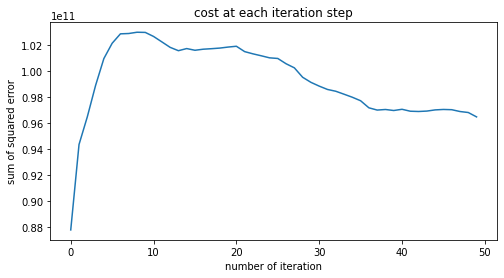

In [73]:
vec_img = reshape_input(target_img)
labels, centroids, sse_list = k_means(vec_img, k = k_value)
plot_iteration_cost(sse_list)

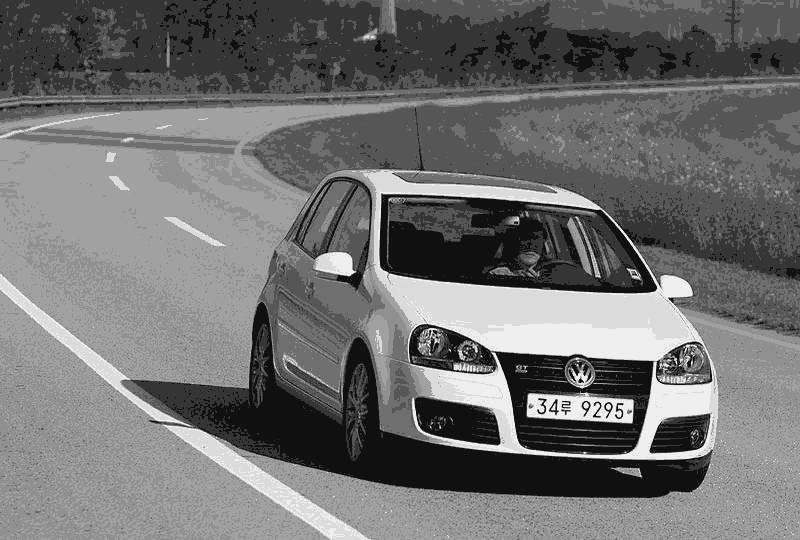

In [74]:
map_label = lambda x: float(centroids[x])
vfunc = np.vectorize(map_label)
labeled = vfunc(labels)
res_labels=labeled.reshape(target_img.shape)
cv2_imshow(res_labels)

In [75]:
# save clustered image to jpg
cv2.imwrite(f'Golf_k={k_value}.jpg',res_labels)

True